In [17]:
#Importing Important Libraries

import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import numpy as np 
import joblib
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# Reading CSV file 
df = pd.read_csv("Customer_Data.csv")
df.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,19877-DEL,Male,35,No,Delhi,7,27,NaN,Yes,No,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,58353-MAH,Female,45,Yes,Maharashtra,14,13,NaN,Yes,Yes,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,25063-WES,Male,51,No,West Bengal,4,35,Deal 5,Yes,No,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,59787-KAR,Male,79,No,Karnataka,3,21,Deal 4,Yes,No,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,28544-TAM,Female,80,No,Tamil Nadu,3,8,NaN,Yes,No,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [3]:
# Checking Null values
df.isnull().sum()

Customer_ID                       0
Gender                            0
Age                               0
Married                           0
State                             0
Number_of_Referrals               0
Tenure_in_Months                  0
Value_Deal                     3548
Phone_Service                     0
Multiple_Lines                  622
Internet_Service                  0
Internet_Type                  1390
Online_Security                1390
Online_Backup                  1390
Device_Protection_Plan         1390
Premium_Support                1390
Streaming_TV                   1390
Streaming_Movies               1390
Streaming_Music                1390
Unlimited_Data                 1390
Contract                          0
Paperless_Billing                 0
Payment_Method                    0
Monthly_Charge                    0
Total_Charges                     0
Total_Refunds                     0
Total_Extra_Data_Charges          0
Total_Long_Distance_Charges 

In [4]:
# Handling The Null Values

df["Value_Deal"] = df["Value_Deal"].fillna("None")
df["Multiple_Lines"] = df["Multiple_Lines"].fillna("No")
df["Internet_Type"] = df["Internet_Type"].fillna("None")
df["Online_Security"] = df["Online_Security"].fillna("No")
df["Online_Backup"] = df["Online_Backup"].fillna("No")
df["Device_Protection_Plan"] = df["Device_Protection_Plan"].fillna("No")
df["Premium_Support"] = df["Premium_Support"].fillna("No")
df["Streaming_TV"] = df["Streaming_TV"].fillna("No")
df["Streaming_Movies"] = df["Streaming_Movies"].fillna("No")
df["Streaming_Music"] = df["Streaming_Music"].fillna("No")
df["Unlimited_Data"] = df["Unlimited_Data"].fillna("No")
df["Churn_Reason"] = df["Churn_Reason"].fillna("Others")
df["Churn_Category"] = df["Churn_Category"].fillna("No")

In [5]:
df.dtypes

Customer_ID                     object
Gender                          object
Age                              int64
Married                         object
State                           object
Number_of_Referrals              int64
Tenure_in_Months                 int64
Value_Deal                      object
Phone_Service                   object
Multiple_Lines                  object
Internet_Service                object
Internet_Type                   object
Online_Security                 object
Online_Backup                   object
Device_Protection_Plan          object
Premium_Support                 object
Streaming_TV                    object
Streaming_Movies                object
Streaming_Music                 object
Unlimited_Data                  object
Contract                        object
Paperless_Billing               object
Payment_Method                  object
Monthly_Charge                 float64
Total_Charges                  float64
Total_Refunds            

In [6]:
df.describe

<bound method NDFrame.describe of      Customer_ID  Gender  Age Married          State  Number_of_Referrals  \
0      19877-DEL    Male   35      No          Delhi                    7   
1      58353-MAH  Female   45     Yes    Maharashtra                   14   
2      25063-WES    Male   51      No    West Bengal                    4   
3      59787-KAR    Male   79      No      Karnataka                    3   
4      28544-TAM  Female   80      No     Tamil Nadu                    3   
...          ...     ...  ...     ...            ...                  ...   
6413   43397-UTT  Female   41      No  Uttar Pradesh                    6   
6414   22240-HAR    Male   51     Yes        Haryana                    0   
6415   78682-KER  Female   65     Yes         Kerala                   14   
6416   17816-ODI    Male   23      No         Odisha                    2   
6417   34476-TAM    Male   73      No     Tamil Nadu                   13   

      Tenure_in_Months Value_Deal Phone_S

In [7]:
df.shape

(6418, 32)

In [8]:
df.size

205376

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6418 entries, 0 to 6417
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer_ID                  6418 non-null   object 
 1   Gender                       6418 non-null   object 
 2   Age                          6418 non-null   int64  
 3   Married                      6418 non-null   object 
 4   State                        6418 non-null   object 
 5   Number_of_Referrals          6418 non-null   int64  
 6   Tenure_in_Months             6418 non-null   int64  
 7   Value_Deal                   6418 non-null   object 
 8   Phone_Service                6418 non-null   object 
 9   Multiple_Lines               6418 non-null   object 
 10  Internet_Service             6418 non-null   object 
 11  Internet_Type                6418 non-null   object 
 12  Online_Security              6418 non-null   object 
 13  Online_Backup     

In [10]:
df.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,19877-DEL,Male,35,No,Delhi,7,27,None,Yes,No,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,No,Others
1,58353-MAH,Female,45,Yes,Maharashtra,14,13,None,Yes,Yes,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,No,Others
2,25063-WES,Male,51,No,West Bengal,4,35,Deal 5,Yes,No,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,59787-KAR,Male,79,No,Karnataka,3,21,Deal 4,Yes,No,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,28544-TAM,Female,80,No,Tamil Nadu,3,8,None,Yes,No,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [11]:
# Removing useless columns 

df.drop(['Customer_ID','Churn_Category', 'Churn_Reason'],axis=1,inplace=True)

# Columns to Encode 

columns_to_encode = ['Gender', 'Age', 'Married', 'State',
       'Number_of_Referrals', 'Tenure_in_Months', 'Value_Deal',
       'Phone_Service', 'Multiple_Lines', 'Internet_Service', 'Internet_Type',
       'Online_Security', 'Online_Backup', 'Device_Protection_Plan',
       'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
       'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
       'Payment_Method', 'Monthly_Charge', 'Total_Charges', 'Total_Refunds',
       'Total_Extra_Data_Charges', 'Total_Long_Distance_Charges',
       'Total_Revenue', 'Customer_Status']

# Encoding Specific Columns 

label_encoder = {}
for columns in columns_to_encode:
    label_encoder[columns] = LabelEncoder()
    df[columns] = label_encoder[columns].fit_transform(df[columns])

# Creating X and Y 

x = df.drop("Customer_Status",axis=1)
y = df["Customer_Status"]

# Spliting The Data into Train and Test 

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)


In [12]:
# Training the Model 

rf_model = RandomForestClassifier(n_estimators=100,random_state=42)
rf_model.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

Confusion Matrix :
[[184  18 117]
 [ 36  51   2]
 [ 42   2 832]]
Accuracy Score :
              precision    recall  f1-score   support

           0       0.70      0.58      0.63       319
           1       0.72      0.57      0.64        89
           2       0.87      0.95      0.91       876

    accuracy                           0.83      1284
   macro avg       0.77      0.70      0.73      1284
weighted avg       0.82      0.83      0.82      1284



Text(0.5, 1.0, 'Feature Importance')

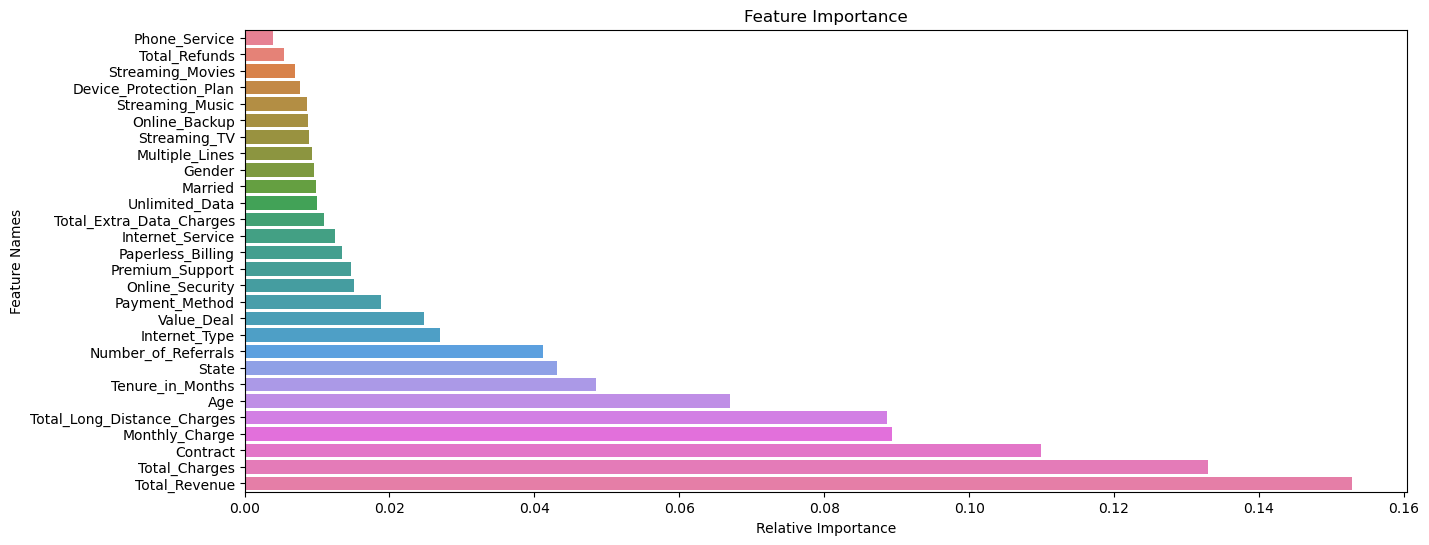

In [23]:
# Predicting The Model 

pred = rf_model.predict(x_test)
pred


print("Confusion Matrix :")
print(confusion_matrix(y_test,pred))
print("Accuracy Score :")
print(classification_report(y_test,pred))

# Feature Selection using Feature Importance 

Importances = rf_model.feature_importances_
indices = np.argsort(Importances)[::1]

# Visualizing the Predicted Model 

plt.figure(figsize=(15,6))
sns.barplot(x=Importances[indices],y=x.columns[indices],hue=x.columns[indices])
plt.xlabel("Relative Importance")
plt.ylabel("Feature Names")
plt.title("Feature Importance")